# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [9]:
import datahandler

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=False, enhanced=True)

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


In [5]:
df = data_loader.enhanced_incidents_df

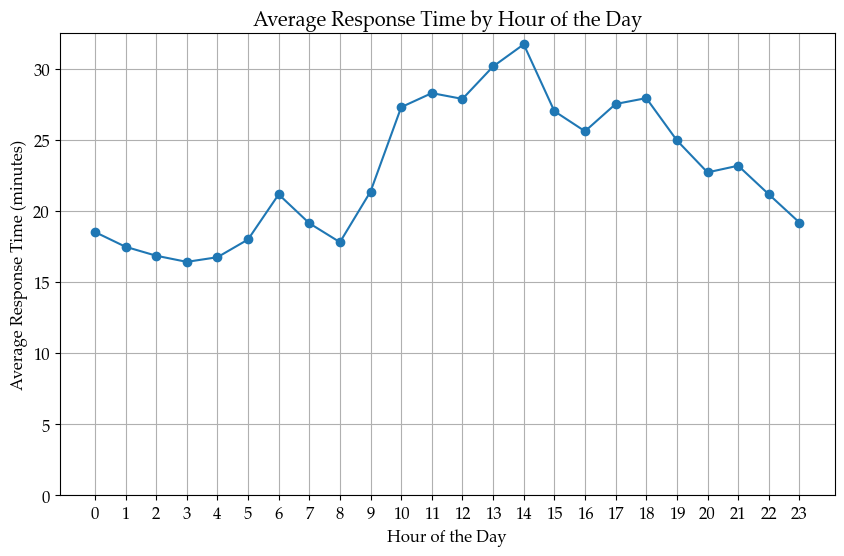

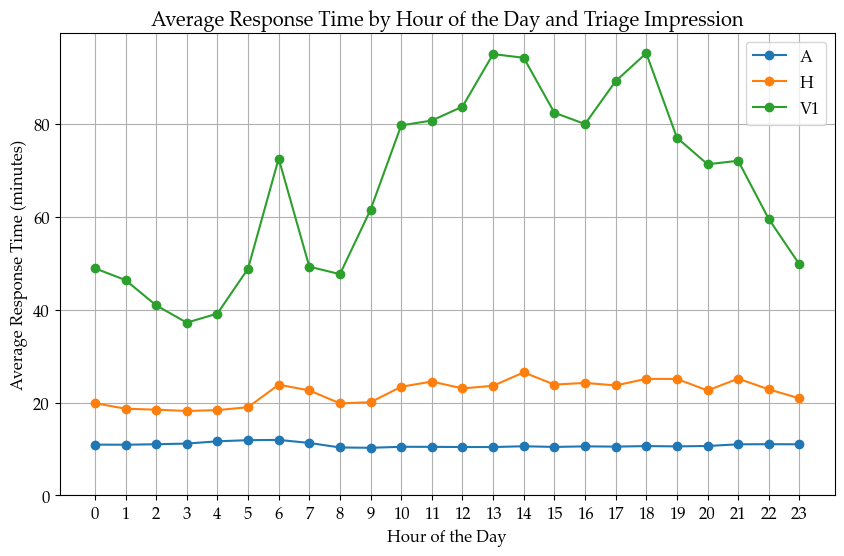

In [6]:
# Plot 1: Average response time by hour of the day, using existing 'response_time'
df['response_time'] = (df['time_ambulance_arrived_at_scene'] - df['time_call_received']) / pd.Timedelta(minutes=1)
avg_response_time_by_hour = df.groupby(df['time_call_received'].dt.hour)['response_time'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_response_time_by_hour.index, avg_response_time_by_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour of the Day')
plt.xticks(range(24))
plt.ylim(0)  # Adjust y-axis to start from 0
plt.grid(True)
plt.show()

# Plot 2: Average response time by hour of the day and triage impression, using existing 'response_time'
response_time_by_hour_triage = df.groupby([df['time_call_received'].dt.hour, 'triage_impression_during_call'])['response_time'].mean().unstack()
plt.figure(figsize=(10, 6))
for triage, data in response_time_by_hour_triage.items():
    plt.plot(data.index, data.values, marker='o', linestyle='-', label=triage)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour of the Day and Triage Impression')
plt.xticks(range(24))
plt.legend()
plt.ylim(0)  # Adjust y-axis to start from 0
plt.grid(True)
plt.show()


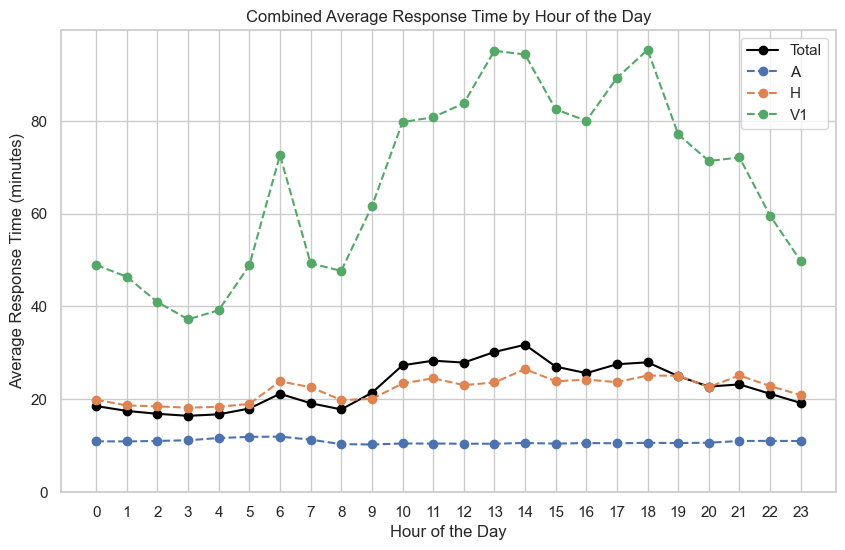

In [10]:
# Adjusting the plot to use seaborn's color palette
sns.set_theme(style="whitegrid")  # Setting the theme for nice background and grid

# Define seaborn color map for clarity
sns_color_map = {
    "A": sns.color_palette("deep")[0],  # Seaborn's default blue
    "H": sns.color_palette("deep")[1],  # Seaborn's default orange
    "V1": sns.color_palette("deep")[2],  # Seaborn's default green
    "Total": "black"  # Keeping 'Total' in black for distinction
}

plt.figure(figsize=(10, 6))

# Plot the overall average response time with a distinct color
plt.plot(avg_response_time_by_hour.index, avg_response_time_by_hour.values, marker='o', linestyle='-', color=sns_color_map["Total"], label='Total')

# Plot the average response time by triage impression with specific seaborn colors
for triage, data in response_time_by_hour_triage.items():
    if triage in sns_color_map:  # Ensure we have a color defined for the triage from seaborn palette
        plt.plot(data.index, data.values, marker='o', linestyle='--', color=sns_color_map[triage], label=triage)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour')
plt.xticks(range(24))
plt.legend()
plt.ylim(0)  # Ensure y-axis starts from 0
plt.show()
